In [29]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import os

from tensorflow.keras import layers, Model, optimizers
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split, GridSearchCV
from keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier

In [30]:
train = pd.read_csv('../data/preprocessed/train_data.csv')
test = pd.read_csv('../data/preprocessed/test_data.csv')
val = pd.read_csv('../data/preprocessed/val_data.csv')

In [31]:
X_train = train.drop("Is high risk", axis=1)
Y_train = train["Is high risk"]

X_test = test.drop("Is high risk", axis=1)
Y_test = test["Is high risk"]

X_val = val.drop("Is high risk", axis=1)
Y_val = val["Is high risk"]

In [32]:
x = layers.Input(shape=(X_train.shape[1],))

h = layers.Dense(64, activation='relu')(x)
h = layers.Dense(64, activation='relu')(h)
h = layers.Dense(64, activation='relu')(h)
h = layers.Dense(64, activation='relu')(h)

y = layers.Dense(1, activation='sigmoid')(h)


model = Model(inputs=x, outputs=y)

In [33]:
# implement early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    min_delta=0.001,     # Minimum change to qualify as an improvement
    patience=100,         # How many epochs to wait after last time val loss improved
    verbose=1,
    mode='min',          # The training will stop when the quantity monitored has stopped decreasing
    restore_best_weights=True  # Restores model weights from the epoch with the best value of the monitored quantity.
)

In [34]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 47)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,617 (61.00 KB)

 Trainable params: 15,617 (61.00 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
optimizer = optimizers.Adam(learning_rate=0.001, 
                            beta_1=0.9, 
                            beta_2=0.999, 
                            amsgrad=True)

model.compile(optimizer=optimizer, 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [36]:
batch_size = 32
epochs = 1000

history = model.fit(X_train, 
                    Y_train, 
                    batch_size=batch_size,
                    validation_data=(X_val, Y_val),
                    callbacks=[early_stopping],
                    epochs=epochs)


Epoch 1/1000
1568/1568 ━━━━━━━━━━━━━━━━━━━━ 2s 842us/step - accuracy: 0.5132 - loss: 160.5263 - val_accuracy: 0.4971 - val_loss: 9.3325
Epoch 2/1000
1568/1568 ━━━━━━━━━━━━━━━━━━━━ 1s 734us/step - accuracy: 0.5288 - loss: 10.6238 - val_accuracy: 0.5082 - val_loss: 3.2401
Epoch 3/1000
1568/1568 ━━━━━━━━━━━━━━━━━━━━ 1s 716us/step - accuracy: 0.5345 - loss: 3.7554 - val_accuracy: 0.5176 - val_loss: 2.5401
Epoch 4/1000
1568/1568 ━━━━━━━━━━━━━━━━━━━━ 1s 741us/step - accuracy: 0.5459 - loss: 2.2274 - val_accuracy: 0.5331 - val_loss: 1.9526
Epoch 5/1000
1568/1568 ━━━━━━━━━━━━━━━━━━━━ 1s 715us/step - accuracy: 0.5443 - loss: 1.7823 - val_accuracy: 0.4940 - val_loss: 1.3542
Epoch 6/1000
1568/1568 ━━━━━━━━━━━━━━━━━━━━ 1s 717us/step - accuracy: 0.5595 - loss: 1.3472 - val_accuracy: 0.5555 - val_loss: 1.1986
Epoch 7/1000
1568/1568 ━━━━━━━━━━━━━━━━━━━━ 1s 722us/step - accuracy: 0.5593 - loss: 1.2431 - val_accuracy: 0.5207 - val_loss: 1.1431
Epoch 8/1000
1568/1568 ━━━━━━━━━━━━━━━━━━━━ 1s 740us/step -

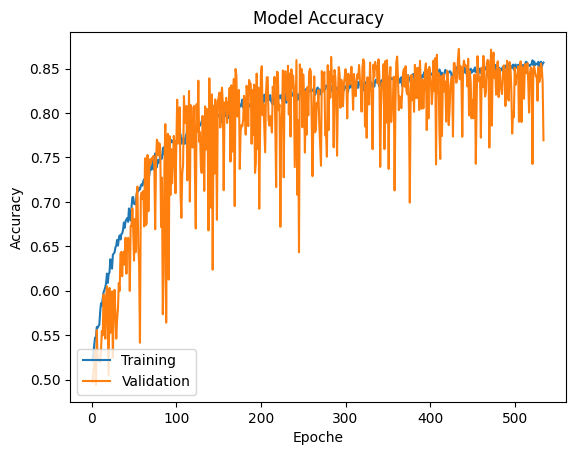

In [37]:
# Print the model training history for accuracy
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy)
plt.plot(epochs, val_accuracy)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoche')
plt.legend(['Training', 'Validation'], loc='lower left')
# plt.xticks(np.arange(1, len(accuracy)+1, 1))
plt.show()

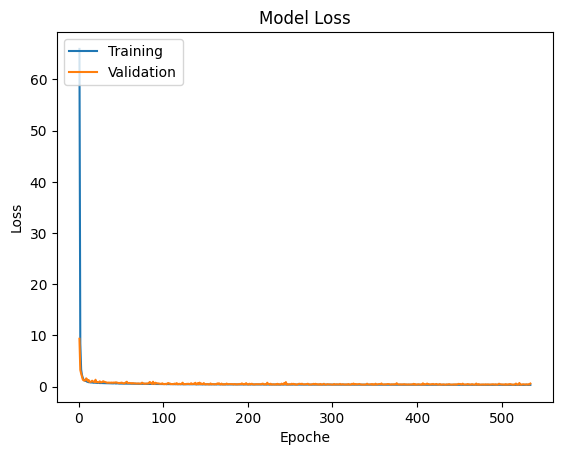

In [38]:
# print the model training history for loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoche')
plt.legend(['Training', 'Validation'], loc='upper left')
# plt.xticks(np.arange(1, len(loss)+1, 1))
plt.show()

In [39]:
model.evaluate(X_test, Y_test)

171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - accuracy: 0.9032 - loss: 0.2735


[0.27531370520591736, 0.9016273617744446]

In [40]:
model.evaluate(X_val, Y_val)

336/336 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - accuracy: 0.8976 - loss: 0.2920


[0.34995436668395996, 0.8722098469734192]

In [41]:
model.evaluate(X_train, Y_train)

1568/1568 ━━━━━━━━━━━━━━━━━━━━ 1s 349us/step - accuracy: 0.8930 - loss: 0.2674


[0.30260297656059265, 0.8625239133834839]